## EDA on Dress Sales dataset

In [1]:
#Importing the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Reading the data in pandas
inp0= pd.read_csv("Attribute+DataSet.csv")
inp1= pd.read_csv("Dress+Sales.csv")

In [3]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [4]:
inp0.Price.describe()

count         477
unique          5
top       Average
freq          240
Name: Price, dtype: object

In [5]:
inp0.Price.value_counts()

Average      240
Low          165
Medium        30
very-high     21
High          21
Name: Price, dtype: int64

In [6]:
inp0.Recommendation.describe()

count    479.000000
mean       0.427975
std        0.495302
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Recommendation, dtype: float64

In [7]:
inp0.Recommendation.value_counts()

0    274
1    205
Name: Recommendation, dtype: int64

### Fixing the Rows and Columns 

As we can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. 

Coverting:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

In [8]:
# Column fixing, correcting size abbreviation. counting the percentage of each size category in "Size" column.
inp0.Size= inp0.Size.replace(['S', 'small', 's'], "Small")

inp0.Size= inp0.Size.replace('free', "Free")

inp0.Size= inp0.Size.replace('M', "Medium")

inp0.Size= inp0.Size.replace('L', "Large") 

inp0.Size= inp0.Size.replace('XL', "Extra large")

In [9]:
# Printing the value counts of each category in "Size" column.
inp0.Size.value_counts(normalize=True)

Medium         0.356994
Free           0.344468
Large          0.194154
Small          0.075157
Extra large    0.029228
Name: Size, dtype: float64

### Impute/Remove Missing values

In [10]:
# Printing the null count of each variables of inp0 and inp1.
inp0.isna().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
dtype: int64

In [11]:
inp1.isna().sum()

Dress_ID        0
29-08-2013      0
31-08-2013      0
09-02-2013      0
09-04-2013      0
09-06-2013      0
09-08-2013      0
09-10-2013      0
09-12-2013      0
14-09-2013      0
16-09-2013      0
18-09-2013      0
20-09-2013      0
22-09-2013      0
24-09-2013      0
26-09-2013    222
28-09-2013      0
30-09-2013    257
10-02-2013    259
10-04-2013    258
10-06-2013      0
10-08-2013    255
10-10-2013    255
10-12-2013      0
dtype: int64

In [12]:
# Printing the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [13]:
# Modifying the "Dress Sales" data set to get null values on string values.
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN

inp1.loc[inp1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN

inp1.loc[inp1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN

inp1.loc[inp1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN

inp1.loc[inp1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN

inp1.loc[inp1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN

In [14]:
# Converting the object type columns in "Dress Sales" into float type of data type.
inp1=inp1.astype("float64")

In [15]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    float64
 2   31-08-2013  479 non-null    float64
 3   09-02-2013  479 non-null    float64
 4   09-04-2013  479 non-null    float64
 5   09-06-2013  479 non-null    float64
 6   09-08-2013  479 non-null    float64
 7   09-10-2013  479 non-null    float64
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    float64
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    float64
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [16]:
# Printing the null percetange of each column of inp1.
inp1.isna().sum()* 100 / len(inp1)

Dress_ID       0.000000
29-08-2013     0.000000
31-08-2013     0.000000
09-02-2013     0.000000
09-04-2013     0.000000
09-06-2013     0.000000
09-08-2013     0.000000
09-10-2013     0.000000
09-12-2013     0.208768
14-09-2013     0.208768
16-09-2013     0.208768
18-09-2013     0.208768
20-09-2013     0.208768
22-09-2013     0.208768
24-09-2013     0.000000
26-09-2013    46.346555
28-09-2013     0.000000
30-09-2013    53.653445
10-02-2013    54.070981
10-04-2013    53.862213
10-06-2013     0.000000
10-08-2013    53.235908
10-10-2013    53.235908
10-12-2013     0.000000
dtype: float64

In [17]:
# Dropping the columns in "Dress Sales" which have more than 40% of missing values.
inp1.drop(['26-09-2013',"30-09-2013",'10-02-2013','10-04-2013','10-08-2013','10-10-2013'],axis=1,inplace=True)

In [18]:
inp1.isna().sum()* 100 / len(inp1)

Dress_ID      0.000000
29-08-2013    0.000000
31-08-2013    0.000000
09-02-2013    0.000000
09-04-2013    0.000000
09-06-2013    0.000000
09-08-2013    0.000000
09-10-2013    0.000000
09-12-2013    0.208768
14-09-2013    0.208768
16-09-2013    0.208768
18-09-2013    0.208768
20-09-2013    0.208768
22-09-2013    0.208768
24-09-2013    0.000000
28-09-2013    0.000000
10-06-2013    0.000000
10-12-2013    0.000000
dtype: float64

In [19]:
# Creating the four seasons columns in inp1, according to the above criteria.
inp1['Spring'] = inp1.apply(lambda x: x['09-04-2013'], axis=1)

inp1['Summer'] = inp1.apply(lambda x: x['29-08-2013'] + x['31-08-2013']+ x['09-06-2013']+ x['09-08-2013']+ x['10-06-2013'], axis=1)

inp1['Winter'] = inp1.apply(lambda x: x['09-02-2013'] + x['09-12-2013']+ x['10-12-2013'], axis=1)

inp1['Autumn'] = inp1.apply(lambda x: x['09-10-2013'] + x['14-09-2013']+ x['16-09-2013']+ x['18-09-2013']+ x['20-09-2013']+ x['22-09-2013']+ x['24-09-2013']+ x['28-09-2013'], axis=1)


In [20]:
# calculating the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Spring,Summer,Winter,Autumn
0,1.006033e+09,2114.0,2274.0,2491.0,2660.0,2727.0,2887.0,2930.0,3119.0,3204.0,...,3386.0,3479.0,3554.0,3706.0,3897.0,4048.0,2660.0,13899.0,9658.0,26857.0
1,1.212192e+09,151.0,275.0,570.0,750.0,813.0,1066.0,1164.0,1558.0,1756.0,...,2106.0,2454.0,2710.0,3258.0,3911.0,4277.0,750.0,6216.0,6405.0,17311.0
2,1.190381e+09,6.0,7.0,7.0,7.0,8.0,8.0,9.0,10.0,10.0,...,10.0,11.0,11.0,11.0,11.0,11.0,7.0,40.0,28.0,82.0
3,9.660060e+08,1005.0,1128.0,1326.0,1455.0,1507.0,1621.0,1637.0,1723.0,1746.0,...,1812.0,1845.0,1878.0,1914.0,1952.0,1963.0,1455.0,7213.0,5012.0,14411.0
4,8.763395e+08,996.0,1175.0,1304.0,1396.0,1432.0,1559.0,1570.0,1638.0,1655.0,...,1824.0,1919.0,2032.0,2252.0,2544.0,2736.0,1396.0,7706.0,5678.0,14676.0


### Merging inp1 with inp0 with left join manner

In [21]:
# Merging inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 478
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
 13  29-08-2013      479 non-null    float64
 14  31-08-2013      479 non-null    float64
 15  09-02-2013      479 non-null    float64
 16  09-04-2013      479 non-null    float64
 17  09-06-2013      479 non-null    flo

In [22]:
inp0['29-08-2013']

0      2114.0
1       151.0
2         6.0
3      1005.0
4       996.0
        ...  
474       0.0
475       0.0
476       0.0
477       0.0
478       0.0
Name: 29-08-2013, Length: 479, dtype: float64

In [23]:
# Dropping the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Spring              0
Summer              0
Winter              1
Autumn              2
dtype: int64

There are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [24]:
# Dealing with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
inp0 = inp0[~inp0.Price.isnull()]

inp0 = inp0[~inp0.Season.isnull()]

inp0 = inp0[~inp0.NeckLine.isnull()]

inp0 = inp0[~inp0.SleeveLength.isnull()]

inp1 = inp1[~inp1.Winter.isnull()]

inp1 = inp1[~inp1.Autumn.isnull()]

In [25]:
# Dealing with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.Material= inp0.Material.replace(np.nan, "Missing")

inp0.FabricType= inp0.FabricType.replace(np.nan, "Missing")

inp0.Decoration= inp0.Decoration.replace(np.nan, "Missing")

inp0['Pattern Type']= inp0['Pattern Type'].replace(np.nan, "Missing")

### Standardise value 

In [26]:
#correcting the spellings.
inp0.Season= inp0.Season.replace('Automn', "Autumn")

inp0.Season= inp0.Season.replace('spring', "Spring")

inp0.Season= inp0.Season.replace('winter', "Winter")

In [27]:
#correcting the Spellings.
inp0.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")

inp0.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")

inp0.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


In [28]:
# Grouping "Style" categories into "Others" which have less than 50000 sales across all the seasons.
inp0["total"]= inp0["Summer"]+ inp0["Autumn"]+ inp0["Winter"]+ inp0["Spring"]
style_group = inp0.total.groupby(inp0["Style"]).sum().reset_index()

In [29]:
style_group

,Style,total
0,Brief,139628.0
1,Casual,1103558.0
2,Flare,2089.0
3,Novelty,13286.0
4,OL,289.0
5,Sexy,452355.0
6,bohemian,69117.0
7,cute,361999.0
8,fashion,395.0
9,party,142041.0


In [30]:
result = style_group.loc[style_group["total"]<50000]
result

,Style,total
2,Flare,2089.0
3,Novelty,13286.0
4,OL,289.0
8,fashion,395.0


In [31]:
total_collection=inp0.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()
total_collection.sum(axis = 1)

<ipython-input-31-9a063abd5fac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_collection=inp0.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()


Style
Brief        139628.0
Casual      1103558.0
Flare          2089.0
Novelty       13286.0
OL              289.0
Sexy         452355.0
bohemian      69117.0
cute         361999.0
fashion         395.0
party        142041.0
sexy          85914.0
vintage      180574.0
work          93095.0
dtype: float64

In [32]:
total_collection[total_collection.sum(axis = 1)<50000]

,Spring,Winter,Autumn,Summer
Style,,,,
Flare,71.0,406.0,1161.0,451.0
Novelty,563.0,2504.0,7353.0,2866.0
OL,15.0,53.0,158.0,63.0
fashion,19.0,74.0,211.0,91.0


In [33]:
inp0.replace(total_collection[total_collection.sum(axis=1)<50000].index, 'Others', inplace=True)

In [34]:
# Calculating the percentage of each categories in the "Style" variable.
inp0.Style.value_counts(normalize=True)*100

Casual      45.974576
Sexy        13.771186
party       10.169492
cute         9.110169
vintage      5.296610
bohemian     4.872881
Brief        3.601695
work         3.601695
Others       2.118644
sexy         1.483051
Name: Style, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [35]:
# Grouping "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
neck_group = inp0["total"].groupby(inp0.NeckLine).sum().reset_index()
result1 = neck_group.loc[neck_group["total"]<50000]
result1

,NeckLine,total
0,Scoop,3135.0
1,Sweetheart,14588.0
2,backless,2888.0
4,bowneck,21633.0
5,halter,2355.0
6,mandarin-collor,289.0
8,open,7396.0
9,peterpan-collor,18908.0
12,sqare-collor,32395.0
13,sweetheart,2728.0


In [36]:
# Grouping "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
inp0["NeckLine"].replace(["Scoop","Sweetheart","backless","bowneck","halter","mandarin-collor","open","peterpan-collor","square-collor","sweetheart"], "Others", inplace=True)
inp0["NeckLine"].unique()

array(['o-neck', 'v-neck', 'boat-neck', 'Others', 'ruffled',
       'turndowncollor', 'slash-neck', 'sqare-collor'], dtype=object)

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [37]:
# Grouping "material" categories into "Others" which have less than 25000 sales across all the seasons.
sleeve_group= inp0.total.groupby(inp0.SleeveLength).sum().reset_index()
result3 = sleeve_group.loc[sleeve_group["total"]<50000]
result3

,SleeveLength,total
0,Petal,30682.0
1,butterfly,29456.0
2,cap sleeves,13603.0
8,turn down collar,3583.0


In [38]:
inp0["SleeveLength"].replace(["Petal","butterfly","cap sleeves","turn down collar"],"Others",inplace=True)
inp0["SleeveLength"].unique()

array(['sleeve less', 'Others', 'full sleeves', 'short', 'three quater',
       'half sleeves'], dtype=object)

In [39]:
# Grouping "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
material_group = inp0["total"].groupby(inp0.Material).sum().reset_index()
result4 = material_group.loc[material_group["total"]<2500]
result4

,Material,total
11,modal,522.0
12,model,245.0
22,wool,859.0


In [40]:
inp0["Material"].replace(["modal","model","wool"],"Others", inplace=True)
inp0["Material"].unique()

array(['Missing', 'microfiber', 'polyster', 'silk', 'chiffonfabric',
       'cotton', 'nylon', 'other', 'milksilk', 'linen', 'rayon', 'lycra',
       'mix', 'acrylic', 'spandex', 'lace', 'Others', 'cashmere',
       'viscos', 'sill', 'shiffon'], dtype=object)

In [41]:
# Grouping "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
fabric_group = inp0["total"].groupby(inp0.FabricType).sum().reset_index()
result5 = fabric_group.loc[fabric_group["total"]<25000]
result5


,FabricType,total
0,Corduroy,10866.0
2,batik,4021.0
5,dobby,2761.0
6,flannael,6835.0
7,flannel,14733.0
9,knitted,14.0
10,knitting,39.0
11,lace,2082.0
12,organza,762.0
13,other,1251.0


In [42]:
inp0["FabricType"].replace(["Corduroy","batik","dobby","flannael","flannel","knitted","knitting","lace","organza","other",
                           "poplin","satin","sattin","terry","tulle","wollen","woolen"],"Others",inplace=True)
inp0["FabricType"].unique()

array(['chiffon', 'Missing', 'broadcloth', 'jersey', 'Others', 'worsted',
       'shiffon'], dtype=object)

In [43]:
# Grouping "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
pattern_group = inp0.total.groupby(inp0["Pattern Type"]).sum().reset_index()
result6 = pattern_group.loc[pattern_group["total"]<25000]
result6

,Pattern Type,total
2,character,3738.0
4,floral,10614.0
6,leapord,3017.0
8,none,5991.0
10,plaid,1369.0
13,splice,5112.0


In [44]:
inp0["Pattern Type"].replace(["character","floral","leapord","none","plaid","splice"],"Others",inplace=True)
inp0["Pattern Type"].unique()

array(['animal', 'print', 'dot', 'solid', 'Missing', 'patchwork',
       'striped', 'geometric', 'Others', 'leopard'], dtype=object)

In [45]:
# Grouping "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
decoration_group = inp0.total.groupby(inp0.Decoration).sum().reset_index()
result7 =  decoration_group.loc[decoration_group.total<25000]
result7

,Decoration,total
1,Tiered,22147.0
5,button,22203.0
6,cascading,210.0
7,crystal,6450.0
8,draped,7099.0
10,feathers,64.0
11,flowers,6676.0
14,none,3551.0
15,pearls,41.0
16,plain,2740.0


In [46]:
inp0["Decoration"].replace(["Tiered","button","cascading","crystal","draped","feathers","flowers","none","pearls","plain",
                           "pockets","rivet","ruched","tassel"],"Others",inplace = True)
inp0.Decoration.unique()

array(['ruffles', 'Missing', 'embroidary', 'bow', 'beading', 'lace',
       'sashes', 'hollowout', 'Others', 'sequined', 'applique'],
      dtype=object)

In [47]:
#checking the sample
inp0.sample(10)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Spring,Summer,Winter,Autumn,total
229,890279029,Casual,Average,4.6,Medium,Autumn,o-neck,short,polyster,Missing,applique,dot,0,138.0,858.0,680.0,2002.0,3678.0
201,951280194,work,Average,4.6,Large,Summer,slash-neck,short,cotton,Missing,Missing,solid,0,390.0,2124.0,1524.0,4051.0,8089.0
273,618420156,party,very-high,4.7,Large,Winter,slash-neck,sleeve less,viscos,chiffon,beading,Missing,1,94.0,286.0,194.0,772.0,1346.0
342,537463111,Casual,Average,4.7,Medium,Summer,o-neck,three quater,chiffonfabric,chiffon,Others,solid,0,321.0,974.0,650.0,2588.0,4533.0
101,1148457078,Casual,Low,0.0,Free,Winter,o-neck,half sleeves,polyster,worsted,Missing,patchwork,1,193.0,1062.0,762.0,2013.0,4030.0
224,720099861,Casual,Average,4.6,Free,Winter,v-neck,full sleeves,cotton,Others,Missing,striped,0,854.0,4289.0,2595.0,6995.0,14733.0
350,869138763,Casual,Average,4.1,Large,Winter,o-neck,sleeve less,polyster,Missing,Missing,Missing,1,30.0,138.0,114.0,372.0,654.0
161,1019768234,vintage,Average,4.8,Large,Winter,o-neck,sleeve less,cotton,Missing,Missing,patchwork,0,309.0,2066.0,1796.0,4651.0,8822.0
52,828623528,Casual,Average,4.6,Free,Autumn,o-neck,sleeve less,polyster,chiffon,sashes,solid,1,1415.0,7338.0,4627.0,12361.0,25741.0
264,898316819,party,Medium,4.6,Small,Winter,Others,short,Missing,Missing,Others,Missing,0,57.0,211.0,169.0,616.0,1053.0


### Caregorical Ordered Univariate Analysis

### Numerical variable Univariate analysis:

In [48]:
# numerical variale: "Autumn".
inp0.Autumn.describe()

count      471.000000
mean      2852.849257
std       5037.033044
min          1.000000
25%        410.500000
50%       1334.000000
75%       3126.000000
max      55532.000000
Name: Autumn, dtype: float64

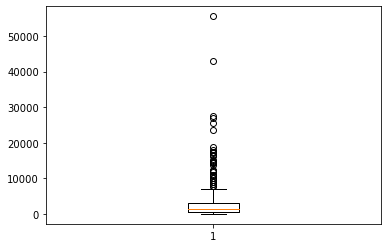

In [50]:
# plotting the boxplot of "Autumn" column.
plt.boxplot(inp1.Autumn);

In [51]:
# Finding the maximum and 99th percentile of Winter season.
inp0.Winter.max() - inp0.Winter.quantile(0.99)

11412.30999999998

In [52]:
# Finding the maximum and 99th percentile of Summer season.
inp0.Summer.max() -  inp0.Summer.quantile(0.99)

21605.499999999993

In [53]:
# Finding the maximum and 99th percentile of Spring season.
inp0.Spring.max() - inp0.Spring.quantile(0.99)

4716.84

In [54]:
# Finding the maximum and 99th percentile of Autumn season.
inp0.Autumn.max() - inp0.Autumn.quantile(0.99)

31397.999999999975

## Bivariate Analysis 

### Numerical- Categorical analysis

In [55]:
# Finding the Mean of Ratings for each Price category.
inp0.groupby("Price")["Rating"].mean()

Price
Average      3.455042
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

In [56]:
# Finding the median of Ratings for each Style category.
inp0.groupby("Style")["Rating"].median()

Style
Brief       4.6
Casual      4.6
Others      0.0
Sexy        4.6
bohemian    4.6
cute        4.6
party       4.7
sexy        4.5
vintage     4.6
work        4.7
Name: Rating, dtype: float64

In [57]:
# Summer sale vs Recommendation.
inp0.groupby("Recommendation")["Summer"].mean()

Recommendation
0    1433.547794
1    1486.295000
Name: Summer, dtype: float64

In [58]:
# Spring sale vs Recommendation.
inp0.groupby("Recommendation")["Spring"].mean()

Recommendation
0    298.209559
1    306.850000
Name: Spring, dtype: float64

In [59]:
# Autumn sale vs Recommendation.
inp0.groupby("Recommendation")["Autumn"].mean()

Recommendation
0    2841.720588
1    2868.060302
Name: Autumn, dtype: float64

In [60]:
# Winter sale vs Recommendation.
inp0.groupby("Recommendation")["Winter"].mean()

Recommendation
0     987.654412
1    1011.695000
Name: Winter, dtype: float64

### Categorical categorical bivariate analysis


Size
Extra large     4
Free           74
Large          33
Medium         76
Small          13
Name: Recommendation, dtype: int64

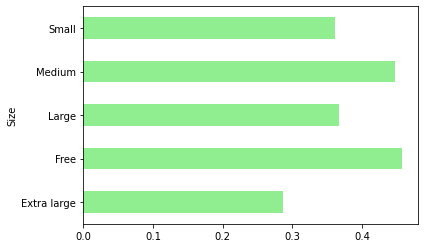

In [61]:
# Size vs Recommendation.
inp0.groupby(['Size'])['Recommendation'].mean().plot.barh(color="lightGreen");
inp0.groupby('Size')['Recommendation'].sum()

### Multivariate analysis 

In [62]:
# plotting the heat map of Style, price and Recommendation.
res = pd.pivot_table(data=inp0, index="Style",columns = "Price",values="Recommendation")
res

Price,Average,High,Low,Medium,very-high
Style,,,,,
Brief,0.333333,NaN,0.000000,NaN,NaN
Casual,0.345455,0.666667,0.379310,0.666667,0.500000
Others,0.375000,NaN,NaN,0.500000,NaN
Sexy,0.344828,0.000000,0.500000,0.000000,0.000000
bohemian,0.333333,NaN,0.666667,1.000000,1.000000
cute,0.400000,0.666667,0.500000,1.000000,NaN
party,0.647059,0.333333,NaN,0.800000,0.823529
sexy,0.500000,NaN,0.750000,0.000000,NaN
vintage,0.352941,0.000000,0.250000,0.500000,NaN


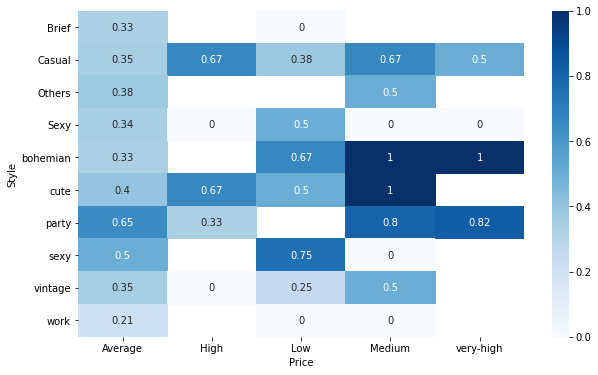

In [63]:
plt.figure(figsize=[10,6])
sns.heatmap(res, annot=True, cmap="Blues");

In [64]:
# plotting the heat map of Season, material and Recommendation.
res2 = pd.pivot_table(inp0, index="Material",columns = "Season", values="Recommendation")
res2

Season,Autumn,Spring,Summer,Winter
Material,,,,
Missing,0.428571,0.657143,0.454545,0.481481
Others,NaN,NaN,0.500000,0.000000
acrylic,NaN,0.000000,0.000000,0.000000
cashmere,0.000000,NaN,NaN,1.000000
chiffonfabric,0.500000,0.600000,0.125000,0.000000
cotton,0.294118,0.576923,0.383562,0.500000
lace,0.000000,NaN,NaN,NaN
linen,0.000000,NaN,0.000000,NaN
lycra,NaN,1.000000,NaN,0.000000


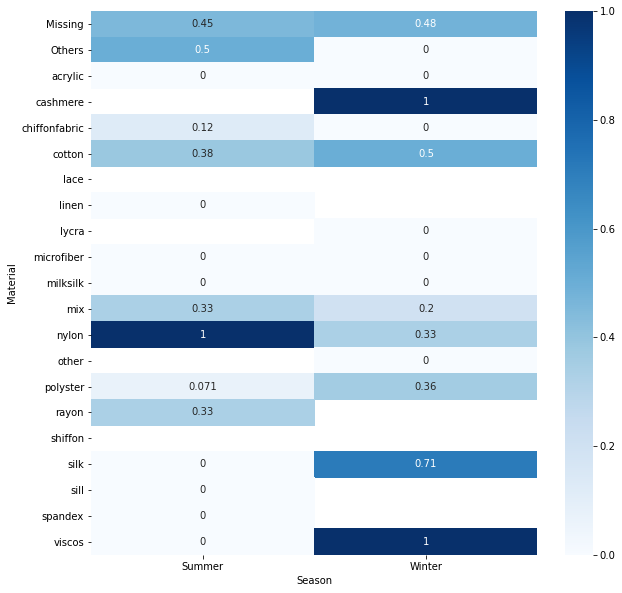

In [65]:
plt.figure(figsize=[10,10])
sns.heatmap(res2[["Summer","Winter"]], annot=True,cmap="Blues");

Thus EDA on the Dress sales dataset has been performed.